# EDA Netflix Titles
#### 1. **Feature Engineering**

Kita akan menambahkan beberapa fitur baru:

- Ekstrak bulan dan tahun dari kolom `date_added`
- Buat flag apakah data mengandung informasi pemeran (`cast`)
- Buat durasi numerik dari kolom `duration` (film = menit, TV = jumlah season)

#### 2. **EDA dan Visualisasi**

Visualisasi akan dilakukan pada setiap kolom utama:

- `type`: Distribusi Movie vs TV Show
- `release_year`: Tren rilisan
- `country`: 10 besar negara produksi
- `rating`: Kategori usia
- `duration`: Distribusi durasi
- `listed_in`: Kategori genre
- `director` dan `cast`: Data missing dan aktor/sutradara terpopuler

#### 3. **Penjelasan Rumus Statistik (jika digunakan)**

Jika nanti ada analisis statistik atau model prediktif digunakan (misal klasifikasi jenis film), maka akan dijelaskan rumus-rumus seperti:

- **Modus (Mode)**: Nilai paling sering muncul
- **Frekuensi Relatif**:  
  \[
  \text{Freq. Relatif} = \frac{\text{jumlah suatu kategori}}{\text{total data}}
  \]
- **Proporsi** dan **Distribusi Kumulatif** juga bisa dijelaskan bila digunakan.

---

### Import Data

In [6]:
import pandas as pd

# Load the Netflix dataset
netflix_df = pd.read_csv("netflix_titles.csv")

# Show basic info and preview
netflix_df.info()
netflix_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Visualisasi EDA Netflix Titles


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset to preserve original
df = netflix_df.copy()

# Feature engineering
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['has_cast'] = df['cast'].notna().astype(int)

# Duration numeric conversion
def parse_duration(duration_str):
    try:
        return int(duration_str.split()[0])
    except:
        return None

df['duration_int'] = df['duration'].apply(parse_duration)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

1. **Distribusi Type:**
  - Sebagian besar konten adalah Movie, sisanya adalah TV Show.
  - Menunjukkan dominasi film dalam katalog Netflix.

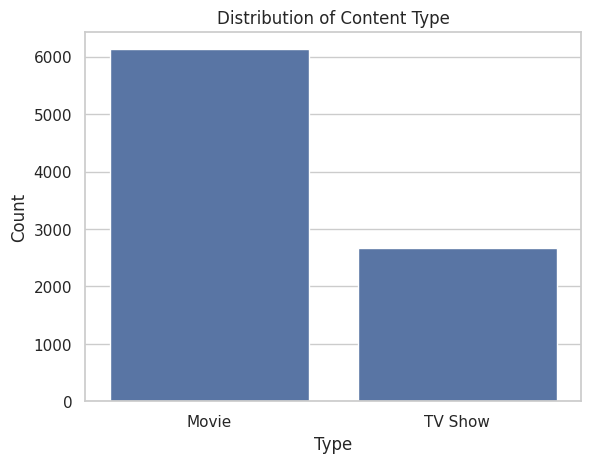

In [8]:
# 1. Type distribution
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

2. **Distribusi Tahun Rilis:**
  - Peningkatan konten terlihat sejak tahun 2000, dengan lonjakan besar setelah 2015.
  - Tren ini menggambarkan peningkatan produksi konten orisinal.

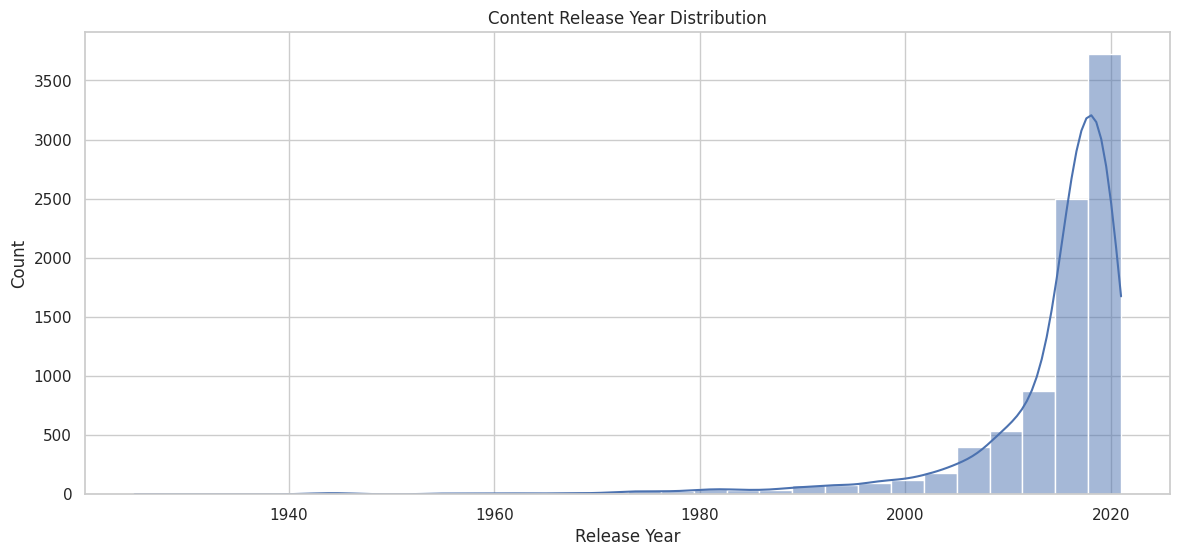

In [9]:
# 2. Release year distribution
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

3. **10 Besar Negara Produksi:**
  - Dominasi jelas dari Amerika Serikat, disusul India dan Inggris.
  - Negara lain menyumbang lebih sedikit konten secara signifikan.

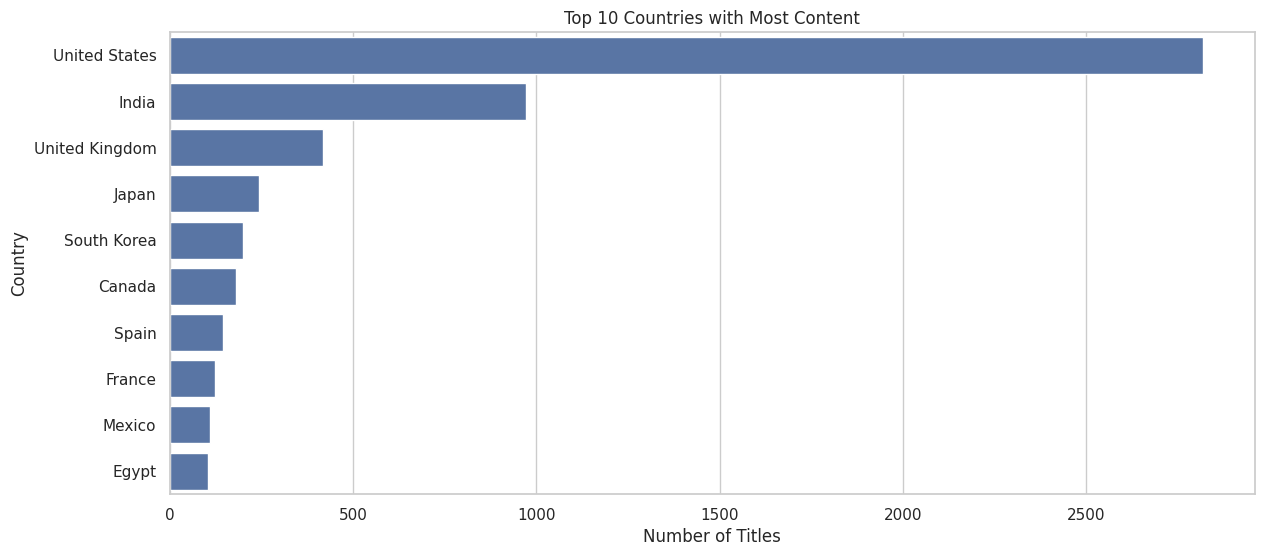

In [10]:
# 3. Top 10 Countries
plt.figure(figsize=(14, 6))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

4. **Distribusi Rating:**
  - Rating TV-MA dan TV-14 paling umum, menunjukkan konten untuk remaja dan dewasa.
  - Sedikit konten untuk anak-anak seperti TV-Y atau G.

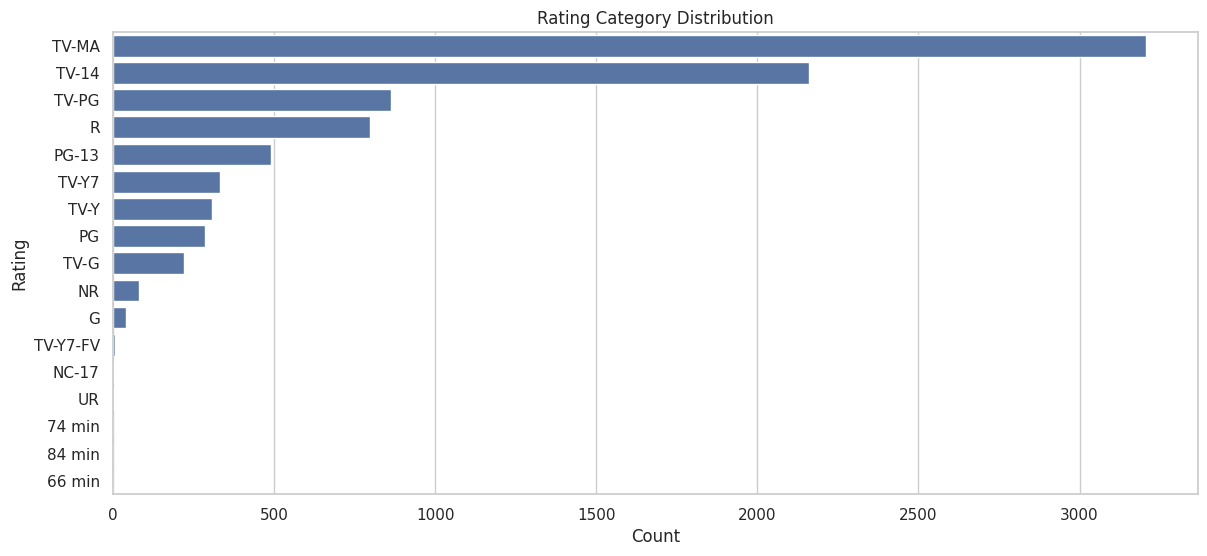

In [11]:
# 4. Rating Distribution
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Rating Category Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

5. **Durasi Film:**
  - Mayoritas film berdurasi 80-100 menit, sesuai durasi film standar.
  - Ada outlier berdurasi panjang, tetapi jumlahnya kecil.

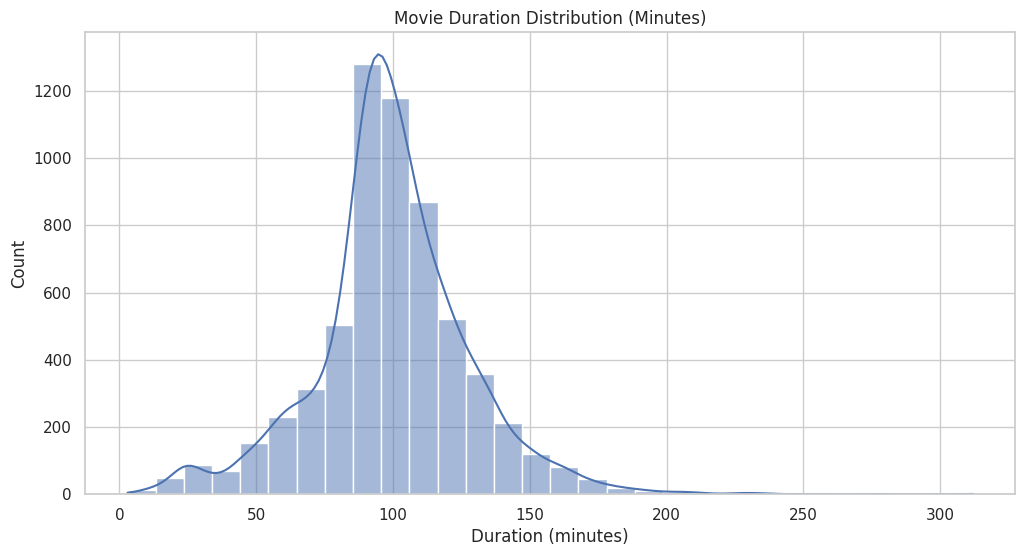

In [12]:
# 5. Duration Distribution for Movies only
plt.figure(figsize=(12, 6))
movie_durations = df[df['type'] == 'Movie']['duration_int'].dropna()
sns.histplot(movie_durations, bins=30, kde=True)
plt.title("Movie Duration Distribution (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

6. **Jumlah Season TV Show:**
  - Kebanyakan TV Show hanya memiliki 1 season, menunjukkan dominasi mini-series atau seri terbatas.

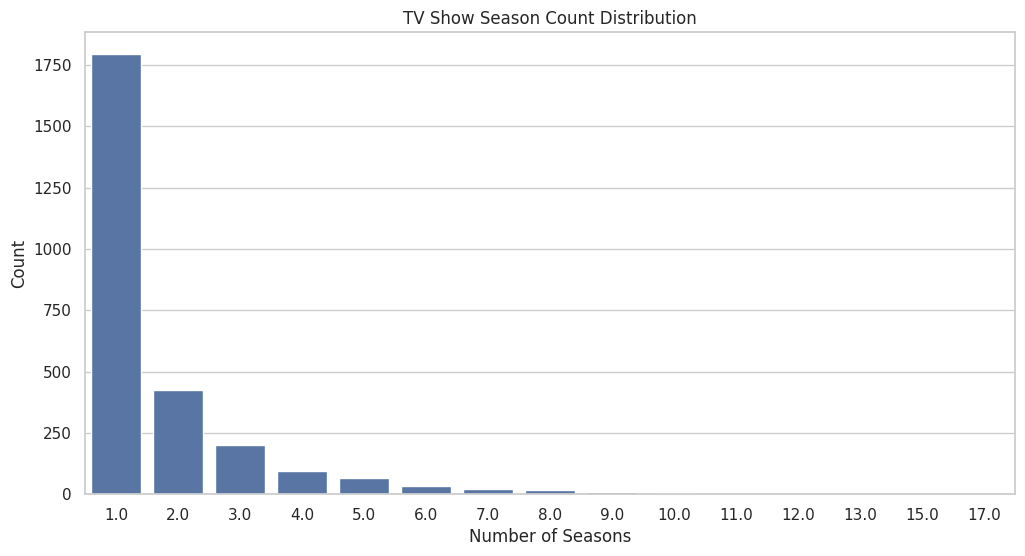

In [13]:
# 6. TV Show Season Counts
plt.figure(figsize=(12, 6))
tv_durations = df[df['type'] == 'TV Show']['duration_int'].dropna()
sns.countplot(x=tv_durations)
plt.title("TV Show Season Count Distribution")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

7. **Jumlah Genre:**
  - Didominasi film internasional dan drama
  - Genre lain juga cukup banyak dibanding genre paling atas

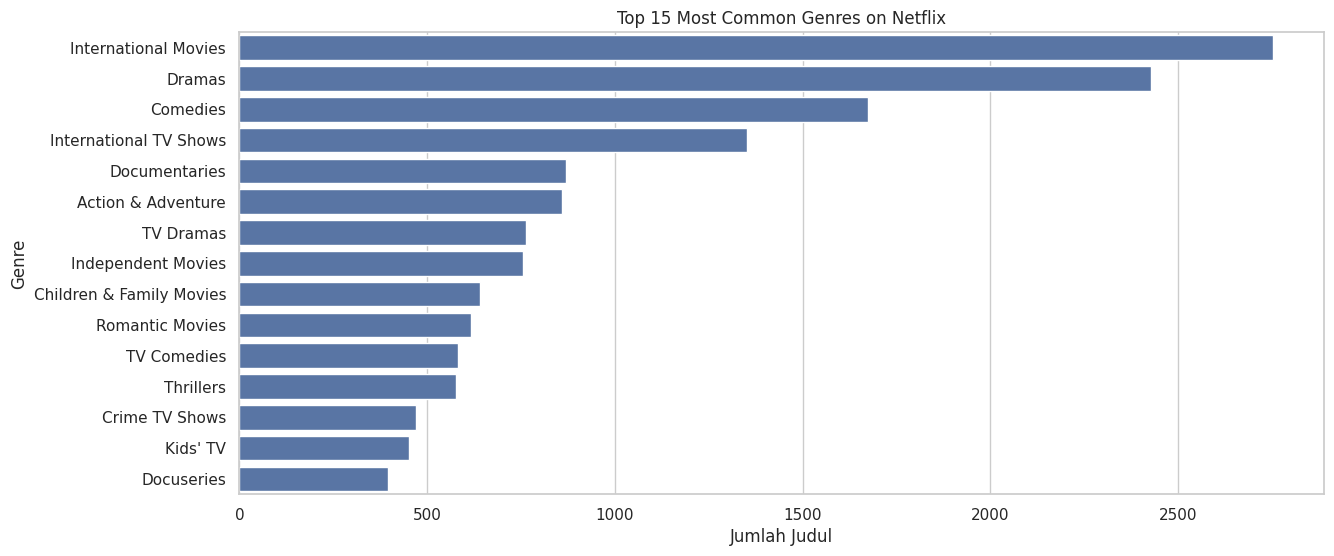

In [14]:
# 7. Genre Counts
df['listed_in'] = df['listed_in'].dropna().str.split(', ')
df_genres = df.explode('listed_in')
genre_counts = df_genres['listed_in'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(y=genre_counts.index[:15], x=genre_counts.values[:15])
plt.title("Top 15 Most Common Genres on Netflix")
plt.xlabel("Jumlah Judul")
plt.ylabel("Genre")
plt.show()


### Kesimpulan Akhir

1. **Dominasi Film**: Sebagian besar konten Netflix berupa film (lebih dari 70%).
2. **Negara Asal**: Amerika Serikat mendominasi produksi konten, dengan India dan Inggris di posisi berikutnya.
3. **Genre Populer**: Genre yang paling umum adalah *Dramas*, *Comedies*, dan *International Movies*, mencerminkan selera global.
4. **Tren Waktu**: Lonjakan signifikan konten terjadi setelah 2015, selaras dengan ekspansi konten orisinal Netflix.
5. **Durasi**: Film umumnya berdurasi 80–100 menit. TV Show didominasi 1 season, menunjukkan tren mini-series.
6. **Rating**: Sebagian besar konten ditujukan untuk remaja dan dewasa (*TV-14* dan *TV-MA*).
7. **Genre**: Film Didominasi genre film internasional dan drama.